In [48]:
import numpy as np
import scipy as sp
import math

import matplotlib.pyplot as plt
# Pauli rotation
Pauli_X = np.array([ [0, 1], [1, 0] ])
Pauli_Y = np.array([ [0, -1.j], [1.j, 0] ])
Pauli_Z = np.array([ [1, 0], [0, -1] ])
Hada = (1/np.sqrt(2)) * np.array([ [1, 1], [1, -1] ])


# Initial state
# |0>
init_state = np.array([ [1], [0] ])

# density matrix
def rho(init_state):
    density_matrix = init_state @ init_state.conj().T
    
    return density_matrix

print("density matrix init:\n", rho(init_state),"\n")    

# == Operation ==

# Hadamard
def Hadamard(density_matrix):
    # oper using rho : oper @ rho @ oper.conj().T
    Hadamard_result = Hada @ density_matrix @ Hada.conj().T
    
    return Hadamard_result
    
    
# Time evolution
def Time_evolve(density_matrix, t, w):
    Hamiltonian = Pauli_Z/2
    Evolution_result = sp.linalg.expm(-1.j * w * t * Hamiltonian)  @ density_matrix @ sp.linalg.expm(1.j * w * t * Hamiltonian)
    
    return Evolution_result


Time_evolve(np.array([ [0.5,0.5], [0.5,0.5] ]),1,1)    

density matrix init:
 [[1 0]
 [0 0]] 



array([[0.5       +1.29011020e-17j, 0.27015115-4.20735492e-01j],
       [0.27015115+4.20735492e-01j, 0.5       -1.29011020e-17j]])

In [49]:
# Ramsey_measurement

def Ramsey_measurement(tau):
    # Get density matrix
    rho_0 = rho(init_state)
    
    # Apply Hadamard
    rho_H = Hadamard(rho_0)
    
    # Time_evolve
    # density_matrix, time, w
    rho_t = Time_evolve(rho_H, tau ,0.5)
    
    # Apply Hadamard
    rho_final = Hadamard(rho_t)
    
    # Calculate expectation value 
    # Observable = np.array([ [0, 0], [0, 1] ]) - np.array([ [1, 0], [0, 0] ])
    Observable = Pauli_Z
    rho_exp = np.trace(rho_final * Observable)
    
    return rho_exp

print('Ramsey_measurement:', Ramsey_measurement(1))

Ramsey_measurement: (0.8775825618903722-1.184752140035488e-17j)


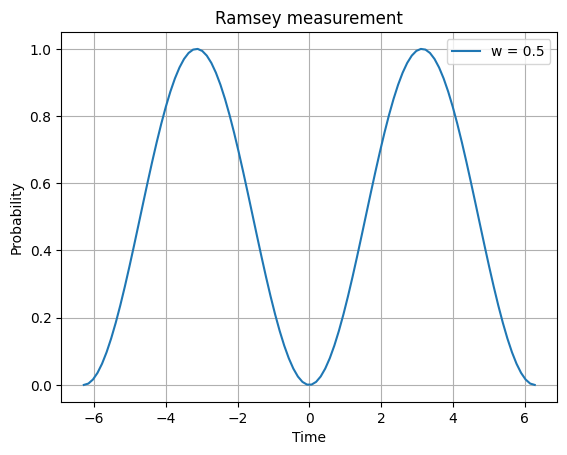

In [52]:
t_variable = (np.linspace(-2*np.pi, 2*np.pi, 100))

measurements = np.zeros(100)

for i in range(len(t_variable)):
    # 1/2 [1 - cos(w_0*t)]
    
    # p = 1 - abs( <0|psi> )^2
    measurements[i] = ( 1 - np.abs(Ramsey_measurement(t_variable[i]))**2 )

    # append circuit(thetas) as elements of arrary(measurements)
    
fig, ax = plt.subplots()
ax.plot(t_variable, measurements, label = 'w = 0.5')
plt.title('Ramsey measurement')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid()